In [13]:
import pandas as pd
import numpy as np
#Scikit-Learn Imports
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, make_scorer, f1_score, recall_score
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go

In [14]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
df=pd.read_csv('Data.csv')
df.index=df['Id']
df=df.drop(columns=['Id'])

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[df.drop(columns=['Class']).columns]=imputer.fit_transform(df[df.drop(columns=['Class']).columns])

In [17]:
df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Id,,,,,,,,,,
1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,benign
1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,benign
1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,benign
1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,benign
1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,benign


In [18]:
df.loc[df['Class']=='benign', 'Class']=0
df.loc[df['Class']=='malignant', 'Class']=1

In [19]:
x= df.drop(columns=['Class'])
y=df['Class']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size=.20)

In [21]:
Model=LinearSVC(random_state=42)
param = {'C': [1, 2.5, 6.25]}
scoring = {'f1': make_scorer(f1_score), 'accuracy': make_scorer(accuracy_score)}
Model = GridSearchCV(estimator = Model, param_grid = param, cv = 3, scoring = scoring, refit = 'f1', n_jobs=-1)
Model.fit(x_train, y_train)

C:\Users\nicho\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1, param_grid={'C': [1, 2.5, 6.25]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'auc': make_scorer(roc_auc_score, needs_threshold=True),
                      'f1': make_scorer(f1_score)},
             verbose=0)

In [28]:
Model.best_params_, Model.best_score_

({'C': 2.5}, 0.954455443247712)

In [23]:
predict_train_dict = {'predict': Model.predict(x_train)}
predict_test_dict = {'predict': Model.predict(x_test)}

In [25]:
#Metrics for the Random Forest Model
print('Model being Tested: Gradient Boosting Classifier')
print('Accuracy of the model on training set: {:.2f}'.format(accuracy_score(y_train, predict_train_dict['predict'])))
print('Accuracy of the model on test set: {:.2f}'.format(accuracy_score(y_test, predict_test_dict['predict'])))
print('Classification Report for Training Set')
print(classification_report(y_train, predict_train_dict['predict']))
print('Classification Report for Test Set')
print(classification_report(y_test, predict_test_dict['predict']))

Model being Tested: Gradient Boosting Classifier
Accuracy of the model on training set: 0.96
Accuracy of the model on test set: 0.93
Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       363
           1       0.97      0.91      0.94       196

    accuracy                           0.96       559
   macro avg       0.96      0.95      0.96       559
weighted avg       0.96      0.96      0.96       559

Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        95
           1       0.97      0.80      0.88        45

    accuracy                           0.93       140
   macro avg       0.94      0.89      0.91       140
weighted avg       0.93      0.93      0.93       140



Confusion matrix, without normalization
[[358   5]
 [ 17 179]]


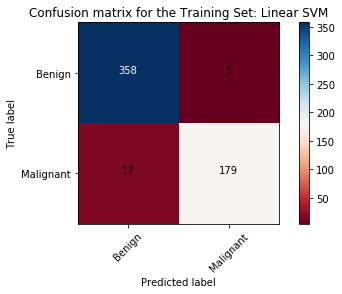

In [29]:
cm_train = confusion_matrix(y_train, predict_train_dict['predict'])
plot_confusion_matrix(cm_train, ['Benign', 'Malignant'], normalize=False, title='Confusion matrix for the Training Set: Linear SVM')

Confusion matrix, without normalization
[[94  1]
 [ 9 36]]


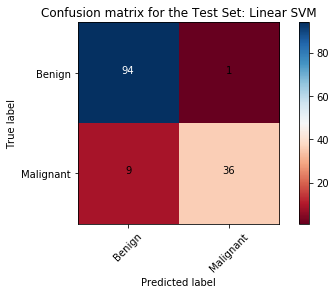

In [30]:
cm_train = confusion_matrix(y_test, predict_test_dict['predict'])
plot_confusion_matrix(cm_train, ['Benign', 'Malignant'], normalize=False, title='Confusion matrix for the Test Set: Linear SVM')